# **Project Title:-** Zomato Restaurant Clustering And Sentiment Analysis

# **Project Description**

Zomato is an indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and pankaj chaddah in 2008.Zomato provides information,menu and user reviews of restaurant,and also has food delivery options from partner restaurants in select cities.India is quite famous for its diverse multicusine available in a large number of restaurants and hotel resorts.which is reminiscent of unity in diversity.Restaurant business in india is always evolving.More indians are warming up to the idea of eating restaurant food whether by dining outside or food delivered.The growing number of restaurent in every state of india has been a motivation to inspect the data to get some insights,interesting facts and figures about the indian food industry in every city.So this project focuses on analysing the zomato restaurant data for each city in india.

The project focuses on customers and company,you have to analyse the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of visualizations.Also,cluster the zomato restaurants into different segments.The data is vizualized as it becomes easy to analyze data at instant.The analysis also solves some of the business cases that can directly help the customers finding the best restaurant in their locality and for the company to grow up and work on the fields they are currenty logging in.This could help in clustering the restaurant into segments.Also the data has valuable information around cuisine and costing which can be used in cost vs.benefit analysis Data could be used for sentiment analysis.Also the meta data for reviewers can be used for identifying the critics in the industry.

# **Dataset Description**

### **Restaurant Data**

* Name:Name of the Restaurants

* Links:URL Links of Restaurants

* Cost:per person estimated cost of dining

* Collection:Tagging of Restaurants w.r.t Zomato categories

* Cuisines:-Cuisines served by restaurants

* Timings:-Restaurent timings

We will be using this dataset for clustering part

### **Review Data**

* Reviewer:Name of the reviewer

* Review:Review text

* Rating:Rating provided

* MetaData:Reviewer metadata-No of reviews and followers

* Time:Date and Time of Review

* Pictures:No of pictures posted with review.

We will be merging this dataset with Names and Metadata and then use for sentiment analysis part.

# **Business context**

The various regional and traditional foods that are native to the Indian subcontinent make up Indian cuisine. You will find something unique to love in every state. Aside from the traditional foods of North and South India, many other civilizations have had a significant influence on and contributed to the development of food culture.To say that indians are food lovers is an understatement.The business of restaurant in india has been booming. People in India like celebrating even the smallest milestones in their life with delicious food and a welcoming environment. Zomato is here to connect customers and restaurants. Zomato is an online directory of Indian restaurants that offers menus, user reviews, and the options of food delivery.They basically takes order on the restaurant behalf and get the food delivered at the convience of your doorstep.

The problem description has two dataset to work on:

* Names of restaurant on Zomato and their associated metadata

* Reviews on Zomato Restaurant

Zomato must analyze its datasets and make informed strategic decisions if it wants to guarantee its success. In order to help customers find the best restaurants in their city and according to their taste, and to understand the areas where they are falling short, the issue statement requests us to group the restaurants. This will aid Zomato in developing a strong consumer recommendation system. Use the restaurant prices and cuisines to conduct a cost-benefit analysis. It is crucial to do sentiment research to learn how customers truly feel about a particular restaurant in order to identify areas that require improvement. to locate the industry critics and, in particular, to work on their assessments in order to develop a reputation worth praising.

## **Data Collection**

In [222]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [223]:
##drive mounted
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
restro_ds= pd.read_csv("/content/drive/MyDrive/Almabetter/Zomato Restaurant names and Metadata.csv")
review_ds= pd.read_csv("/content/drive/MyDrive/Almabetter/Zomato Restaurant reviews.csv")

In [225]:
restro_ds.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [226]:
review_ds.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


## **Preprocessing and Cleaning of Data**

In [227]:
restro_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


The "Collections" categorization column, which is essentially just a list of tags provided by zomato to improve search results, is missing almost 50% of the data. Even when imputed using various categorical data imputing measures, it would be challenging to match tags that are similar to those of the restaurants, and it would be even more challenging to turn such tags into useful numerical features later. If a variable has 50% or more missing values, it is better to drop it if the amount of information it contains is not too great.

In [228]:
#Dropping collections
restro_ds.drop('Collections',axis=1,inplace=True)

In [229]:
#Imputting one missing timing row with the mode
restro_ds['Timings'].fillna(restro_ds['Timings'].mode()[0],inplace=True)

In [230]:
#Checking if any null value is there
restro_ds.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [231]:
#changing datatype of cost
restro_ds['Cost'] = restro_ds['Cost'].str.replace(',','')
restro_ds['Cost'] = restro_ds['Cost'].astype('int')

In [232]:
review_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [233]:
##exploring the null rows in review columns
review_ds[review_ds['Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


To grasp the thoughts, the text in the "Review" column must be evaluated, and this study is impossible without it. The majority of the null values in the review column also contain nulls in other comparable fields, including Reviewer, Rating, Metadata, and Time, as can be observed. These instances ought to be removed.

In [234]:
##dropping the null rows reviews first
review_ds.dropna(subset = ["Review"], inplace= True)

In [235]:
review_ds.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [236]:
review_ds['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [237]:
##replacing like and correcting and changing the datatype
review_ds['Rating'] = review_ds['Rating'].replace('Like','4')
review_ds['Rating'] = review_ds['Rating'].astype('float')

## **Feature Engineering**

The process of choosing, modifying, and converting unprocessed data into practical numerical characteristics that machine learning algorithms may use is known as feature engineering.

## **Zomato Restaurant names and Metadata**

First off, there are columns in the restaurant dataset like Links, Cuisine, and Timings that cannot be easily understood. The Links column can be used to determine the restaurant's location. There are a few categories in which cuisines can be combined, as well as a total number of cuisines that a specific restaurant serves. Timings can be categorized into three categories in order to simplify analysis.

In [238]:
restro_ds.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [239]:
#using this function to determine restaurant location
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
restro_ds['Location'] = restro_ds['Links'].apply(location)

In [240]:
##We can see that the restraunts in Hyderabad makeup the dataset
restro_ds['Location'].unique()

array(['hyderabad', 'thetiltbarrepublic'], dtype=object)

In [241]:
#exploring the other value
restro_ds[restro_ds.isin(['thetiltbarrepublic'])].stack()

68  Location    thetiltbarrepublic
dtype: object

In [242]:
restro_ds.loc[68,:]

Name                            The Tilt Bar Republic
Links       https://www.zomato.com/thetiltbarrepublic
Cost                                             1500
Cuisines           North Indian, Continental, Italian
Timings                12noon to 12midnight (Mon-Sun)
Location                           thetiltbarrepublic
Name: 68, dtype: object

In [243]:
#dropping the unnecessary columns
restro_ds.drop(['Links','Location'],axis=1,inplace=True)

In [244]:
#Time is not required so it is better to drop it
review_ds.drop(['Time'],axis=1,inplace=True)

### **Cuisins**

Here, it is clear that the many cuisines offered by each restaurants are represented as strings, hence it is crucial to classify and construct dummy variables for each cuisine offered. The steps taken to accomplish this are as follows:



* To retrieve the cuisines in the list datatype, strings are first divided.

* To comprehend the distinctive cuisines and the regularity with which they appear, a frequency dictionary is developed.

* To reduce the amount of unique cuisines, an effort is made to group and categorize various misspelling cuisines.

* The one-hot encoded version of these dishes is what we need next.To get these a dataframe is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [245]:
#splitting to create list instead of strings
restro_ds['Cuisines'] = restro_ds['Cuisines'].apply(lambda x : x.split(','))

#creating a list of all cuisine list for various restaurant
cuisine_list = []
for idx in restro_ds.index:
  cuisine_list.append(restro_ds['Cuisines'][idx])

#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [246]:
# frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

## frequency dictionary
frequency_dict

{'Chinese': 7,
 ' Continental': 17,
 ' Kebab': 5,
 ' European': 2,
 ' South Indian': 7,
 ' North Indian': 28,
 'Biryani': 4,
 ' Chinese': 36,
 'Asian': 5,
 ' Mediterranean': 4,
 ' Desserts': 11,
 ' Seafood': 3,
 ' Beverages': 5,
 'Seafood': 1,
 ' Goan': 1,
 ' Asian': 10,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 4,
 'Ice Cream': 2,
 'Street Food': 2,
 ' Fast Food': 10,
 'Mediterranean': 1,
 ' BBQ': 1,
 'Continental': 4,
 ' American': 2,
 'North Indian': 33,
 ' Italian': 12,
 ' Finger Food': 1,
 'European': 2,
 'Burger': 2,
 ' Biryani': 12,
 ' Japanese': 2,
 ' Salad': 5,
 ' Sushi': 4,
 'Mexican': 1,
 'Mughlai': 1,
 'Fast Food': 5,
 'Andhra': 3,
 'Bakery': 6,
 ' Mughlai': 5,
 ' Juices': 1,
 'Arabian': 1,
 'Italian': 2,
 ' Andhra': 3,
 ' Hyderabadi': 3,
 'Cafe': 5,
 ' Spanish': 1,
 ' Wraps': 1,
 'Finger Food': 1,
 ' Thai': 2,
 ' Indonesian': 1,
 'South Indian': 2,
 ' Bakery': 1,
 'Modern Indian': 1,
 'Desserts': 2,
 'Kebab': 1,
 ' Momos': 3,
 'BBQ': 1,
 ' Modern Indian': 1,
 ' Burg

Many of the cuisines may be identified by the extra space inserted at the string's beginning, which indicates a misspelled word. For instance, the terms "North Indian" and "North Indian" are used to describe two varieties of North Indian food.




Another point to note is the creation of several pointless categories. 'Chinese' and 'Momos', for instance, are both listed in the dataset as different cuisines. Let's try to correct them collectively.

In [247]:
#reducing the number of cuisines  by sorting and classification
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}


In [248]:
crown_ds = restro_ds.copy()

In [249]:
##This function returns a list of cuisines that are correctly mapped free of errors using the dictionary that was built
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of the particular raw
  for elem in cuisine:
    # for evey key value in the dictionary
    for key,value in cuisine_dict.items():
      # if the cuisine is accurate and matches with one of the unique keys,then we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other element doesnt match if search and value and append the key for that value
      if elem in value:
        list1.append(key)

  return list(set(list1)) # returns a unique cuisines list

In [250]:
##  receiving the desired list as row values for the cuisins columns after correcting it
crown_ds['Cuisines'] = crown_ds['Cuisines'].apply(cuisine_corrector)

In [251]:
crown_ds.head(3)

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"[South Indian, North Indian, European, Chinese...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"[Hyderabadi, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,1300,"[Desserts, North Indian, Mediterranean, Asian]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


The following steps is to assign values for the special cuisine columns features based on the available row values

In [252]:
# concatenate new columns with the dataset
crown_ds = pd.concat([crown_ds,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [253]:
# iterating for every row in the dataframe
for i, row in crown_ds.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(crown_ds.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          crown_ds.loc[i,column] = 1
        else:
          crown_ds.loc[i,column] = 0

In [254]:
crown_ds.head(2)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,"[South Indian, North Indian, European, Chinese...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,Paradise,800.0,"[Hyderabadi, North Indian, Chinese]",11 AM to 11 PM,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
# verifying the value of 1st restaurant
crown_ds.loc[0,'Cuisines']

['South Indian',
 'North Indian',
 'European',
 'Chinese',
 'Mughlai',
 'Continental']

In [256]:
## creating a new column to show the total number of dishes that restaurants serve
crown_ds['Total Cuisines'] = crown_ds['Cuisines'].apply(lambda x : len(x))

In [257]:
crown_ds.head(1)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800.0,"[South Indian, North Indian, European, Chinese...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,6


In [258]:
#drop cuisines column
crown_ds.drop(['Cuisines'],axis=1,inplace=True)

### **Timings**

In [259]:
#finding the unique values in timings
crown_ds['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [260]:
crown_ds.drop(['Timings'],axis=1,inplace=True)

The restaurants are generally open at the same time and don't really provide a considerable variations to cluster the restaurants,according to an analysis of the unique values in the timings columns.

### **Restaurants Average Ratings**

In [261]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = review_ds.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [262]:
## adding a capability for average ratings to the metadata dataframes and restaurants names
crown_ds = crown_ds.merge(restaurant_ratings,on='Name',how='left')
crown_ds.rename(columns={'Rating':'Avg Rating'},inplace=True)
crown_ds.head(1)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28


In [263]:
##information on final dataset
crown_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [264]:
crown_ds['Avg Rating'].fillna(0,inplace=True)

## **Zomato Restaurant reviews**

In [265]:
review_ds.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [266]:
# splitting meta data into reviews and followers seperately
review_ds['Reviews'], review_ds['Followers'] = review_ds['Metadata'].str.split(',').str
review_ds['Reviews'] = pd.to_numeric(review_ds['Reviews'].str.split(' ').str[0])
review_ds['Followers'] = pd.to_numeric(review_ds['Followers'].str.split(' ').str[1])

review_ds.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0,1,2.0


In [267]:
review_ds.drop(['Metadata'],axis=1,inplace=True)

In [268]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = review_ds.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


# **Exploratory Data Analysis**

Data analysis must include exploratory data analysis. It involves exploring and analyzing the provided dataset to find trends, patterns, and conclusions to help users make better decisions regarding the data. The results are frequently summarized using statistical graphics and other tools for data visualization. To study the data, Python modules like pandas are used, while matplotlib and seaborn are used to show it.

Some important aspects to include in the project are as follows:

* Best restaurants in the area

* The Hyderabadi Cuisins that are very Popular

* Costs of Dining at restaurants

* Benefit-Cost Analysis

* Hypotheses Generation on visualized data for Clustering

## **Best Restaurants in the city**

The best restaurants are chosen based on a variety of characteristics, including cuisine, price, location, and reviews, but the most important ones are cuisine, price, and reviews. When choosing a good restaurant, the first consideration is if the type of food you enjoy is served there. The quality of the food should also be excellent. Value for money is the second factor; it's crucial to get what we are being paying for. Reviews are put in place to aid in the judgments given above. People who have frequented the restaurant multiple times offer you an impression of how it is.

The dataset here has the features- Name, Cost, Total Cuisines, and Average Ratings to help in the decision making. Best restaurants in the city would be having low cost and high ratings and the number of total cuisines served. Let's go ahead and explore a bit.

In [269]:
# sorting out best parameters
best_restaurants = crown_ds[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

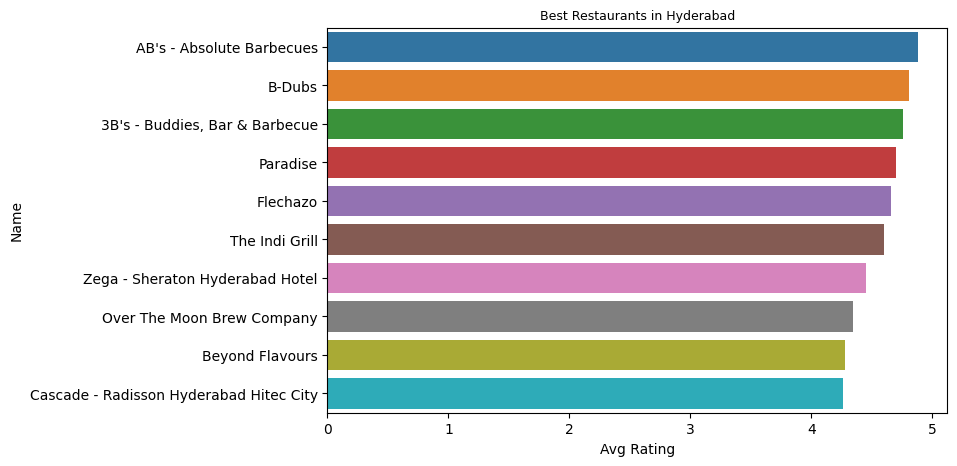

In [270]:
#visualizing the best restaurnts
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=9)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

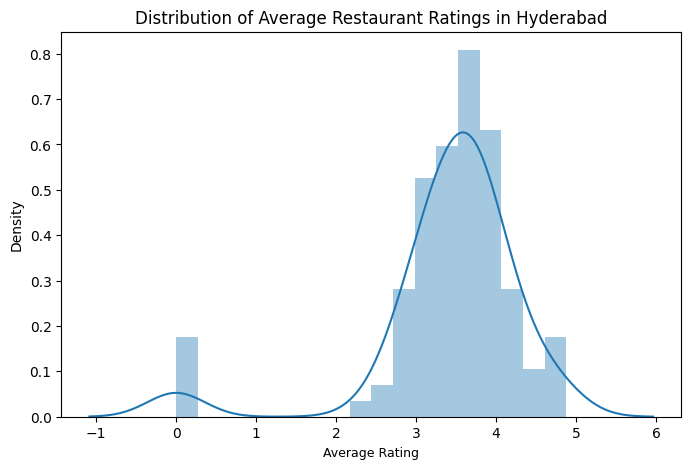

In [271]:
#Average ratings distribution in hyderabad
sns.distplot(x=crown_ds['Avg Rating'])
plt.xlabel('Average Rating',size=9)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=12)

There aren't many restaurants in the original restaurant dataset that haven't yet received reviews from customers; the majority of eateries have ratings between 3.5 and 4. The business should work to enhance the current restaurants by pushing them to respond to customer feedback and include restaurants with better services in the future to improve the distribution of overall ratings.

### **The Most popular cuisines in hyderabad**

In [272]:
#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [crown_ds[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
popular_cuisines

,Cuisines,Total Restaurants
0,North Indian,64
1,Chinese,45
2,Continental,39
3,Hyderabadi,18
4,Fast Food,17
5,Italian,15
6,Asian,15
7,Desserts,14
8,Mughlai,13
9,South Indian,9


Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

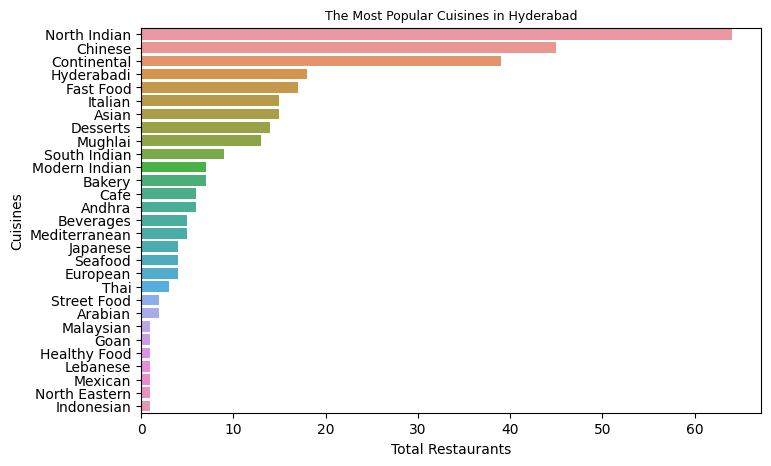

In [273]:
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=9)

Although South India is where the restaurants are, North Indian cuisine predominates there, followed by Chinese and Continental. The number of cuisines shows the variety of food alternatives Hyderabad offers.

## **Restaurants and their costs**

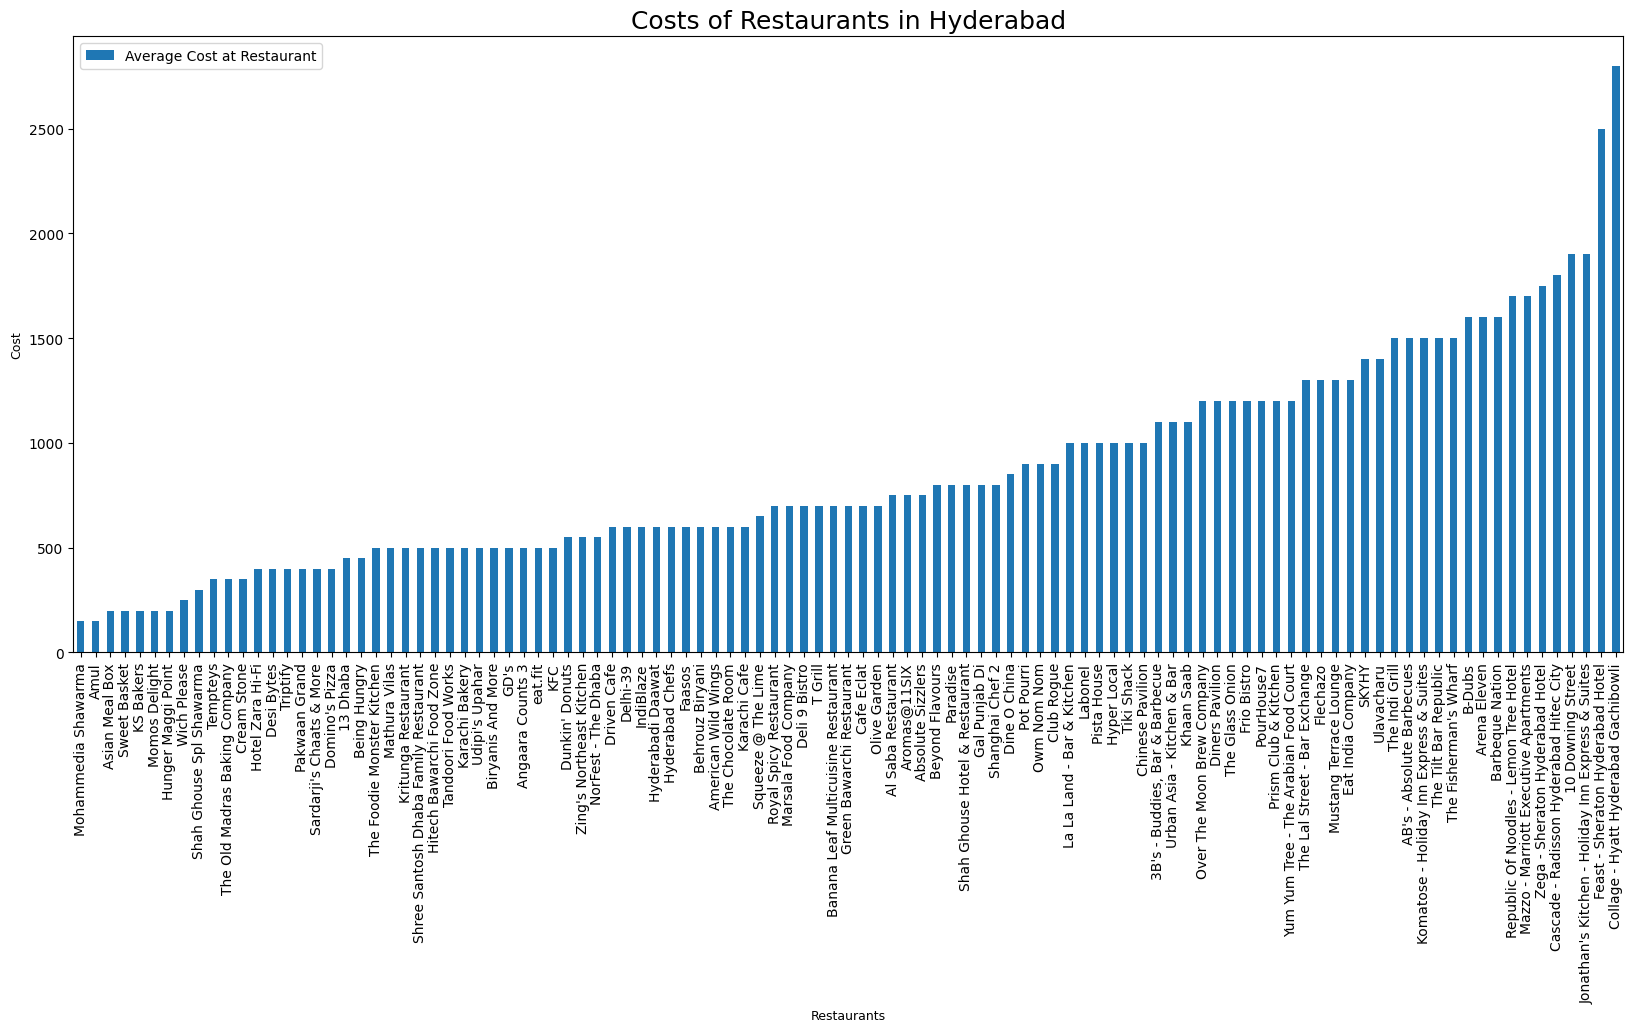

In [274]:
#visualizing Restaurant Costs
crown_ds.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=9)
plt.ylabel('Cost',size=9)
plt.title('Costs of Restaurants in Hyderabad',size=18)
plt.legend(['Average Cost at Restaurant'])

In [275]:
##Top 5 cheapest restaurants
crown_ds[['Name','Cost']].sort_values(['Cost']).head()

,Name,Cost
89,Mohammedia Shawarma,150.0
23,Amul,150.0
54,Asian Meal Box,200.0
101,Sweet Basket,200.0
59,KS Bakers,200.0


The dataset's cheapest restaurants are basically fast food businesses and bakeries.

In [276]:
##Top 5 costliest restaurants
crown_ds[['Name','Cost']].sort_values(['Cost'],ascending=False).head()

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800.0
56,Feast - Sheraton Hyderabad Hotel,2500.0
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0


The dataset's most expensive restaurants are 4 star or above hotel

Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

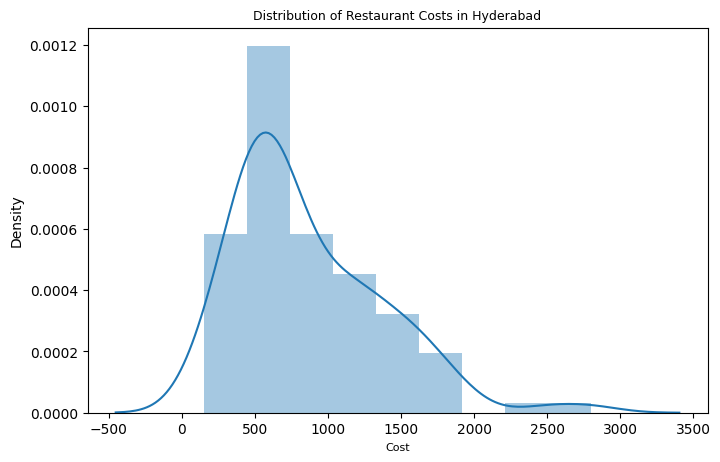

In [277]:
#distribution of Cost in Hyderabad
sns.distplot(x=crown_ds['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=9)

Many of the restaurants fall in the range of 500-1000INR

## **Cost-Benefit Analysis**

Whenever you start a business project or make a business decision you need to analyze whether the decision will be worthwhile. A cost-benefit analysis compares the benefits of a decision with the expenses associated with executing it in order to determine whether the decision is worthwhile. You will profit from that choice if the anticipated advantages outweigh the anticipated costs; otherwise, it is crucial to develop a superior strategy.

As we know Zomato is a search engine for Indian restaurants and an online food delivery service. Zomato specializes on online dining bookings, loyalty programs, and meal delivery. Restaurant chains who want to reach a wider audience and app users who simply want to sample local restaurant and different cuisines are the company's target clients.Here is a simple benefit-Cost analysis that can be carried out on the basis of the little information we can assume.

## **Costs**

When calculating costs, beginning with direct costs, which are defined as costs directly associated with creating a good or service (or carrying out a project or making a business decision), in Zomato's case, principally the mobile app. A large crew needs to work on maintaining the application, developing strategies, including the restaurants, marketing, food delivery partners, and customer support. A direct expense would be the employees' salary.

Utilities, rent, partners, advertisements, and other expenses are indirect costs.

Other costs, such as poor social media presence, unfavorable reviews on the platform that cause customers to completely shun the application, etc., are more difficult to quantify.

## **Benefits**

Advertising is the major source of revenue generator. In order to get the attention and exposure of a significant portion of the Zomato subscriber and user base, restaurants are increasingly seeking to advertise themselves on the Zomato feed.

Zomato charges the restaurant a commission through the meal delivery service based on the number of orders.Restaurants who send deliveries to the company pay a commission, which is subsequently split between the company's delivery partners and itself. However, compared to other revenue sources, internet meal delivery only accounts for a small fraction of total income due to fierce competition, the necessity to provide considerable discounts, etc.

## **Comparison**

The information we have includes the price per person, the menu options, and the restaurant's overall rating. Zomato will have difficulties if a restaurant has a low number of popular cuisines, a high per-person cost, and poor rating performance. Negative reviews would incur an intangible cost for the company, and as a result, the business would begin to lose daily app users. Because of their enormous viewership, Zomato receives advertising from many eateries, which is a benefit to the business.

In order to improve its overall customer experience, Zomato must first identify which restaurants it needs to focus on. If improvement tactics fail, Zomato must delist such restaurants themselves

In [278]:
# filtering out the restaurants with avg rating less than 3 and sorting them out acc to high cost
low_rating_ds = crown_ds[crown_ds['Avg Rating'] < 3].sort_values(['Avg Rating', 'Cost'],ascending=[True,False],ignore_index=True)
low_rating_ds.head(1)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Republic Of Noodles - Lemon Tree Hotel,1700.0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,4,0.0


In [279]:
#drop restaurants that were not rated yet
low_rating_ds =low_rating_ds[low_rating_ds['Avg Rating'] != 0].reset_index(drop=True)
low_rating_ds

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Hotel Zara Hi-Fi,400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.400
1,Asian Meal Box,200.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2.580
2,Pakwaan Grand,400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.710
3,Mathura Vilas,500.0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,2.820
4,Behrouz Biryani,600.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.825
5,The Chocolate Room,600.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.830
6,Shree Santosh Dhaba Family Restaurant,500.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.830
7,KFC,500.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.850
8,Club Rogue,900.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.880
9,Desi Bytes,400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.900


Text(0.5, 1.0, 'The Cuisines in Restaurants with Low Ratings')

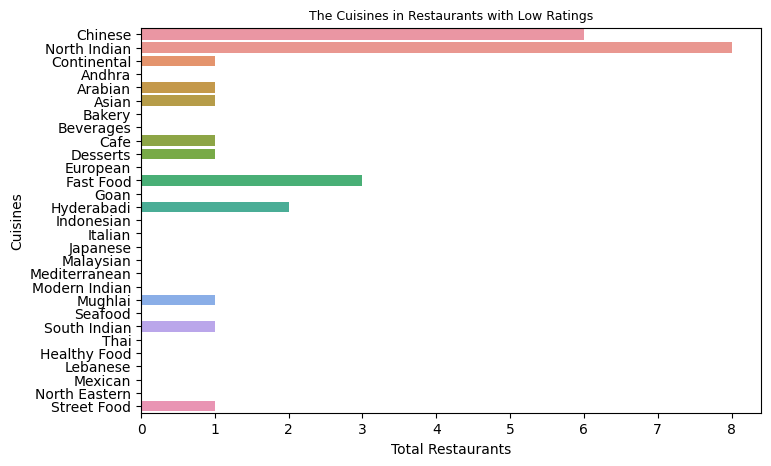

In [280]:
#cuisines involved in the low ratings dataframe
ds_lr = pd.DataFrame()
ds_lr['Cuisines'] = cuisines1
ds_lr['Total Restaurants'] = [low_rating_ds[i].sum() for i in cuisines1]
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=ds_lr)
plt.title(f'The Cuisines in Restaurants with Low Ratings',size=9)

Text(0.5, 1.0, 'Restaurants with Low Ratings')

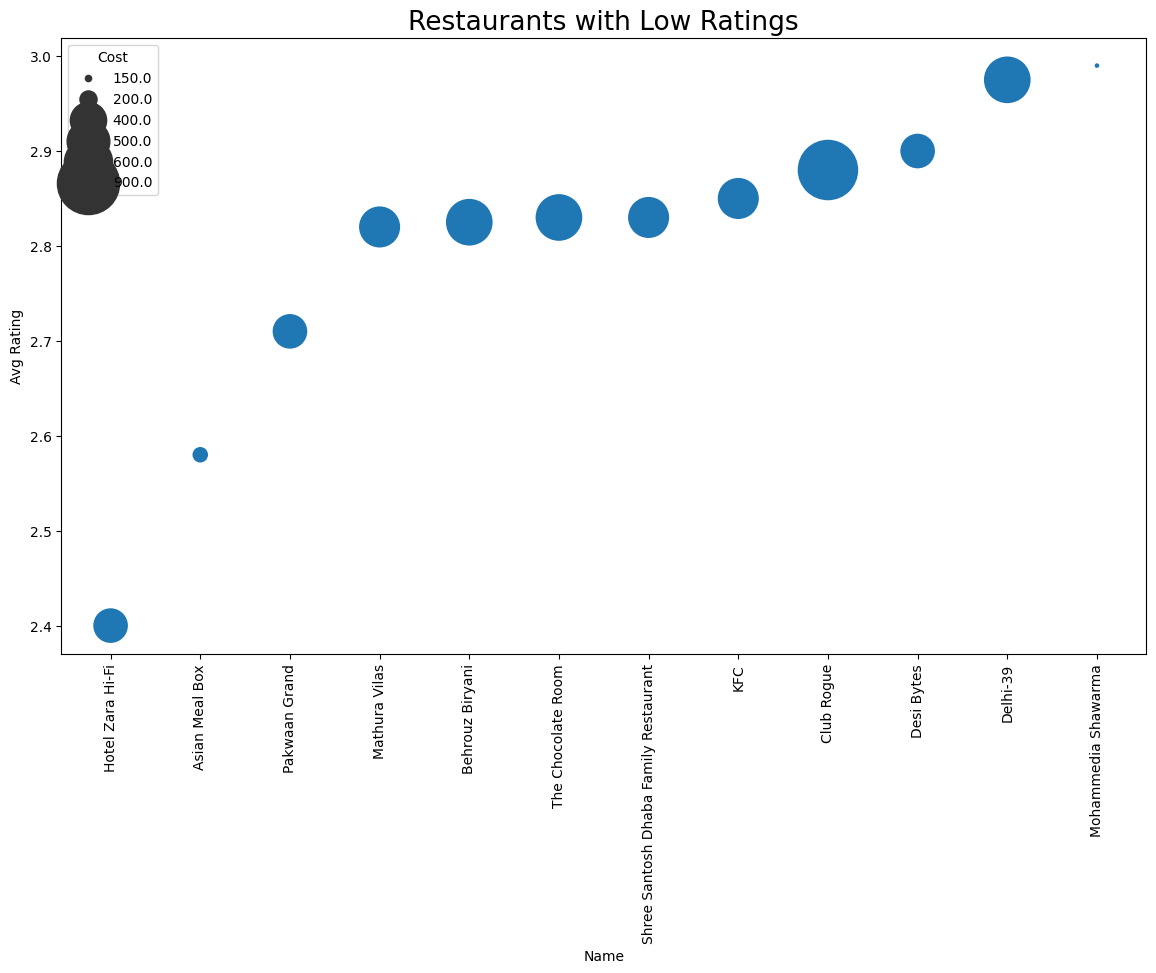

In [281]:
#visualizing the restaurants
plt.figure(figsize=(14,8))
sns.scatterplot(data=low_rating_ds, x="Name", y="Avg Rating", size="Cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=19)

These establishments are essentially fast-food places or restaurants that charge a lot for the meals they serve. More effort should be put into advertising, and reviews, particularly for these eateries, should be examined and improved. Mohammedia Shawarma has the best reviews and is the most affordable. It appears to be functioning effectively.

### **Hypotheses Generation on visualized data for Clustering**

The premise for clustering is the shared characteristics of the data points. The proximity of these locations helps to explain the parallels. By spotting certain commonalities in the data that has been shown, the following hypotheses can be developed:

Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.

High-rated restaurants are likely to be pricey and employ a comparable pricing strategy. Depending on the costs, they can be grouped together.
Restaurants serving some of the most well-liked cuisines can be grouped together, and because there are so few of them, restaurants serving exotic cuisines like Indonesian, Mexican, and Japanese can also be grouped together.

## **Restaurant Clustering**

### **Feature Scaling**

In [282]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [283]:
#fitting numerical columns
numerical_cols = ['Cost','Total Cuisines','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(crown_ds[numerical_cols])
scaled_ds = crown_ds.copy()
scaled_ds[numerical_cols] = scaler.transform(crown_ds[numerical_cols])

In [284]:
#setting name as index for both datasets
crown_ds['Index'] = list(range(0,105))
crown_ds.set_index(['Index','Name'],inplace=True)
scaled_ds['Index'] = list(range(0,105))
scaled_ds.set_index(['Index','Name'],inplace=True)

#### **Kmeans Clustering on Cost and Ratings**

In [285]:
from sklearn.cluster import KMeans

In [286]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only
wcss=[]
for i in range(1,12):
    km=KMeans(n_clusters=i)
    km.fit(scaled_ds[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

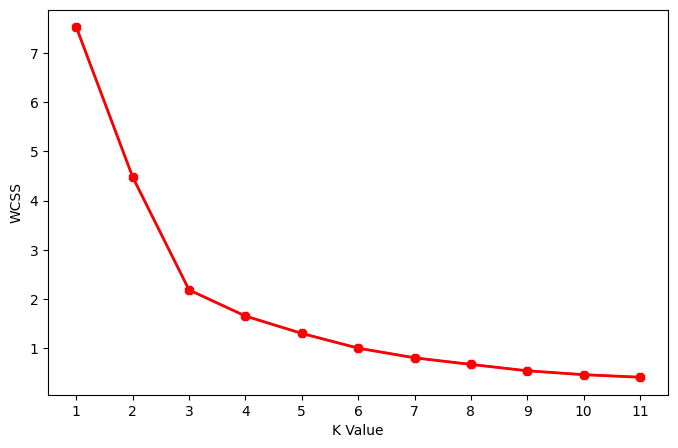

In [287]:
plt.plot(range(1,12),wcss)
plt.plot(range(1,12),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12,1))
plt.ylabel("WCSS")

In this case, five clusters would be the ideal number. It is evident that the WCSS barely decreases after 5 o'clock. Let's go ahead and model for 5 clusters

In [288]:
kmeans_ds1 = scaled_ds.copy()

In [289]:
##K-means fit on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_ds1[['Cost', 'Avg Rating']])
kmeans_ds1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

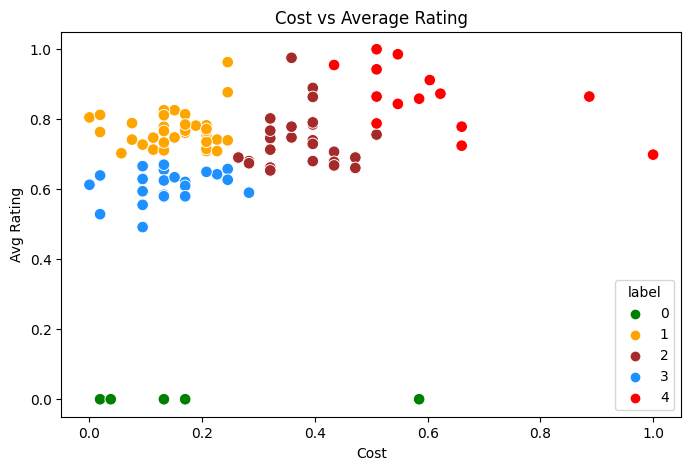

In [290]:
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_ds1  ,s = 70 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating')
plt.title('Cost vs Average Rating')

The clusters may generally be distinguished from each other. Since there were only two input variables, it was easier to discriminate between and analyze them.

* Restaurants with label 0 were listed in the names dataset but weren't reviews.

* Restaurants in label 1 have high ratings and reasonable prices.

* Label 2 consists of upscale eateries with favorable reviews and reasonable prices.

* Small food joints with modest prices fall under the label 3, yet they received average reviews.

* Label 4 are pricey restaurants that also received above-average reviews.

In [291]:
#Sum of Squared Errors for different Values of K Within Cluster
wcss=[]
for i in range(1,12):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(scaled_ds)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

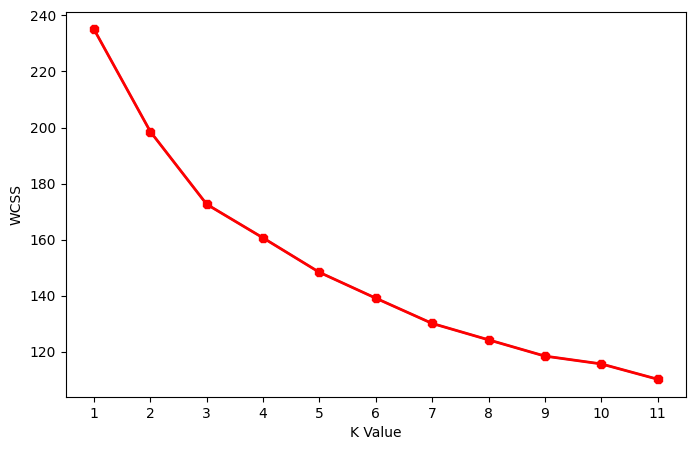

In [292]:
##the elbow curve
plt.plot(range(1,12),wcss)
plt.plot(range(1,12),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12,1))
plt.ylabel("WCSS")

* There may be clusters in the data even though K-means did not detect any of them.

* The algorithm employed cannot split clusters if there is no elbow.

* As the number of dimensions increase, K-means' ability to discriminate between examples decreases. The "curse of dimensionality" refers to this unfavorable effect of high-dimensional data.

#### **Multidimensional KMeans Restaurant Clustering**

* Principal Component Analysis

* Silhouette Score

* Kmeans Clustering

* Cluster Exploration

In [293]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_ds)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19820424 0.16016826 0.08685552]
Cumulative variance explained by 3 principal components: 44.52%


Parameter: {'n_clusters': 2} Score 0.33983533227298746
Parameter: {'n_clusters': 3} Score 0.41349515733579634
Parameter: {'n_clusters': 4} Score 0.44370743597533946
Parameter: {'n_clusters': 5} Score 0.47803319795625815
Parameter: {'n_clusters': 6} Score 0.5170146504327767
Parameter: {'n_clusters': 7} Score 0.5170770866645323
Parameter: {'n_clusters': 8} Score 0.5154086364739642
Parameter: {'n_clusters': 9} Score 0.5043936710778324
Parameter: {'n_clusters': 10} Score 0.5155364343966392
Parameter: {'n_clusters': 11} Score 0.5361718637886653


Text(0.5, 0, 'Number of Clusters')

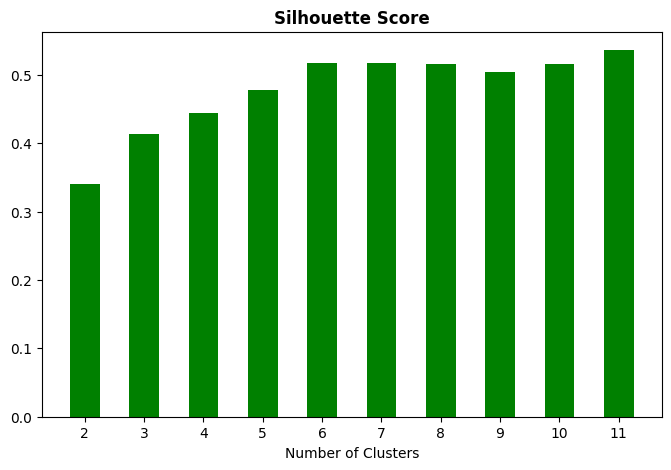

In [294]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,12))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 12)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [295]:
##fitting k-means
kmeans_pca = KMeans(n_clusters=6,random_state=12)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=6, random_state=12)

In [296]:
## fit predict kmeans
kmeans_pca_ds = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=crown_ds.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_ds["label"] = pred_pca

Text(0.5, 0, 'PC3')

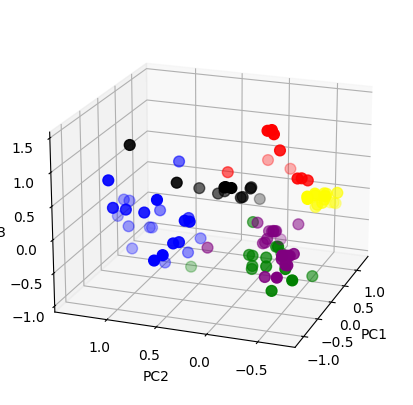

In [297]:
# plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_ds.PC1[kmeans_pca_ds["label"] == 0], kmeans_pca_ds.PC2[kmeans_pca_ds["label"] == 0], kmeans_pca_ds.PC3[kmeans_pca_ds["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_ds.PC1[kmeans_pca_ds["label"] == 1], kmeans_pca_ds.PC2[kmeans_pca_ds["label"] == 1], kmeans_pca_ds.PC3[kmeans_pca_ds["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_ds.PC1[kmeans_pca_ds["label"] == 2], kmeans_pca_ds.PC2[kmeans_pca_ds["label"] == 2], kmeans_pca_ds.PC3[kmeans_pca_ds["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_ds.PC1[kmeans_pca_ds["label"] == 3], kmeans_pca_ds.PC2[kmeans_pca_ds["label"] == 3], kmeans_pca_ds.PC3[kmeans_pca_ds["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_ds.PC1[kmeans_pca_ds["label"]== 4], kmeans_pca_ds.PC2[kmeans_pca_ds["label"] == 4], kmeans_pca_ds.PC3[kmeans_pca_ds["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_ds.PC1[kmeans_pca_ds["label"]== 5], kmeans_pca_ds.PC2[kmeans_pca_ds["label"] == 5], kmeans_pca_ds.PC3[kmeans_pca_ds["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

In [298]:
##Let's combine the labels with the initial dataset and explore.
kmeans_pca_ds.head(2)

,,PC1,PC2,PC3,label
Index,Name,,,,
0,Beyond Flavours,-0.885802,0.659062,-0.330774,2
1,Paradise,-0.858827,-0.606427,-0.020201,0


In [299]:
#joining the cluster labels to names dataframe
crown_ds = crown_ds.join(kmeans_pca_ds['label'])
crown_ds.head(2)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
1,Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,0


In [300]:
crown_ds['label'].value_counts()

0    25
2    24
3    17
4    16
5    13
1    10
Name: label, dtype: int64

### **Exploring cluster**

#### **Cluster 0**

In [301]:
#exploring cluster 0
crown_ds[crown_ds['label']==0].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
1,Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,0
3,Shah Ghouse Hotel & Restaurant,800.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,5,3.21,0
17,Hotel Zara Hi-Fi,400.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.40,0


In [302]:
#describe
crown_ds[crown_ds['label']==0].describe()

,Cost,Total Cuisines,Avg Rating,label
count,25.000000,25.00000,25.000000,25.0
mean,674.000000,3.16000,3.240249,0.0
std,272.381473,0.85049,0.834899,0.0
min,400.000000,2.00000,0.000000,0.0
25%,500.000000,3.00000,2.975000,0.0
50%,600.000000,3.00000,3.290000,0.0
75%,750.000000,4.00000,3.690000,0.0
max,1500.000000,5.00000,4.700000,0.0


In [306]:
  #cluster cuisines
def cluster_cuisines(ds, cluster):
    pop_cuisines_ds = pd.DataFrame()
    pop_cuisines_ds['Cuisines'] = cuisines1
    pop_cuisines_ds['Total Restaurants'] = [ds[i].sum() for i in cuisines1]
    #visualizing cuisines
    sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_ds)
    plt.title(f'The Most Popular Cuisines in {cluster}',size=12)


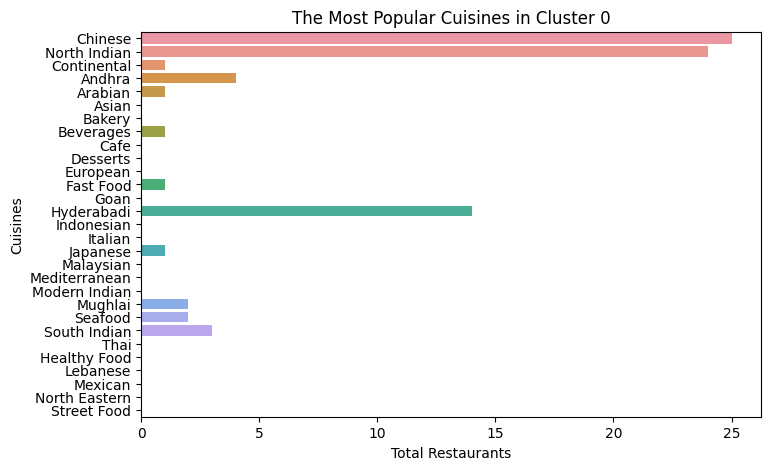

In [307]:
#visualizing cuisines in cluster 0
cluster_cuisines(crown_ds[crown_ds['label']==0],'Cluster 0')

#### **Observation of cluster 0:**

* The restaurants in cluster 0 have popular cuisines available with them including North Indian, Chinese and especially Hyderabadi.

* The average Cost is 675 INR and the average rating is 3.22. These restaurants are casual dining restaurants with lower per person cost and has rating than.

#### **Cluster 1**

In [309]:
#exploring cluster
crown_ds[crown_ds['label']==1].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
12,Absolute Sizzlers,750.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3.62,1
47,Shanghai Chef 2,800.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,4,3.06,1
54,Asian Meal Box,200.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2.58,1


In [310]:
#describe
crown_ds[crown_ds['label']==1].describe()

,Cost,Total Cuisines,Avg Rating,label
count,10.000000,10.000000,10.000000,10.0
mean,890.000000,2.400000,3.185000,1.0
std,532.186266,1.173788,1.219617,0.0
min,200.000000,1.000000,0.000000,1.0
25%,600.000000,2.000000,3.137500,1.0
50%,825.000000,2.000000,3.635000,1.0
75%,1075.000000,3.500000,3.706250,1.0
max,1750.000000,4.000000,4.450000,1.0


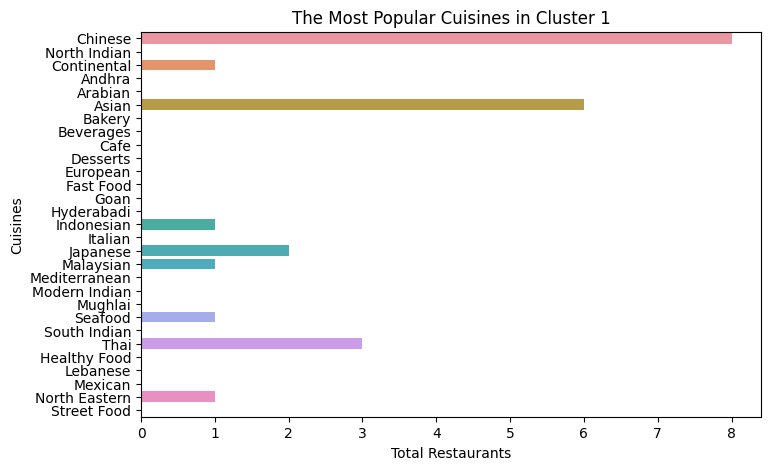

In [311]:
#visualizing cuisines in cluster 1
cluster_cuisines(crown_ds[crown_ds['label']==1],'Cluster 1')

#### **Observation of cluster 1:**

The majority of the food offered by the restaurants in cluster 1 is Chinese and Asian.

The average cost is 890 INR and average rating is 3.18.The Cost of these restaurant is little higher.

#### **Cluster 2**

In [312]:
#exploring cluster 2
crown_ds[crown_ds['label']==2].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
4,Over The Moon Brew Company,1200.0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5,4.34,2
5,The Fisherman's Wharf,1500.0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5,4.22,2


In [314]:
#describe
crown_ds[crown_ds['label']==2].describe()

,Cost,Total Cuisines,Avg Rating,label
count,24.000000,24.000000,24.000000,24.0
mean,1331.250000,4.208333,3.776667,2.0
std,487.186354,1.020621,0.421660,0.0
min,500.000000,2.000000,3.190000,2.0
25%,1000.000000,3.750000,3.400000,2.0
50%,1250.000000,4.000000,3.807500,2.0
75%,1525.000000,5.000000,4.196250,2.0
max,2800.000000,6.000000,4.600000,2.0


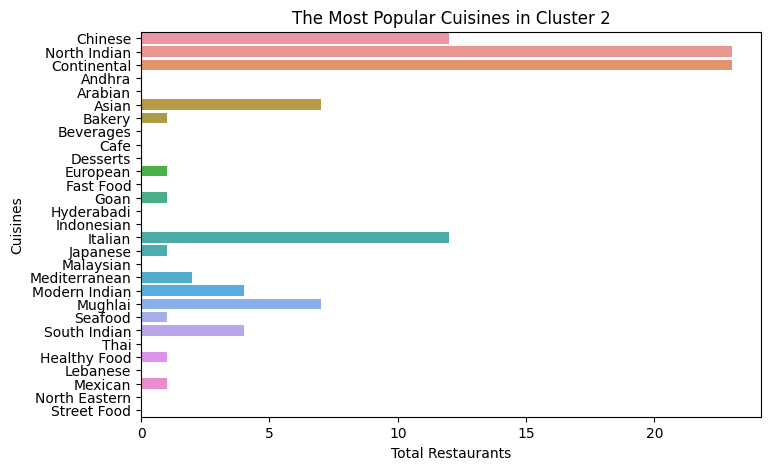

In [315]:
#visualizing cuisines in cluster 2
cluster_cuisines(crown_ds[crown_ds['label']==2],'Cluster 2')

#### **Observation of Cluster 2:**

* The restaurants in cluster 2 offer all of the well-known cuisines, including North Indian, Chinese, and Continental.
* The average cost is 1429 INR, and the average rating is 3.88,which is better than the other 2 clusters.These restaurants are fine dinning restaurants.

#### **Cluster 3**

In [316]:
#exploring cluster 3
crown_ds[crown_ds['label']==3].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4,4.66,3
10,Sardarji's Chaats & More,400.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,3.25,3
14,AB's - Absolute Barbecues,1500.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.88,3


In [317]:
#describe
crown_ds[crown_ds['label']==3].describe()

,Cost,Total Cuisines,Avg Rating,label
count,17.000000,17.000000,17.000000,17.0
mean,823.529412,2.588235,3.633235,3.0
std,363.626546,1.003670,0.624402,0.0
min,400.000000,1.000000,2.825000,3.0
25%,500.000000,2.000000,3.260000,3.0
50%,700.000000,3.000000,3.480000,3.0
75%,1100.000000,3.000000,3.800000,3.0
max,1500.000000,4.000000,4.880000,3.0


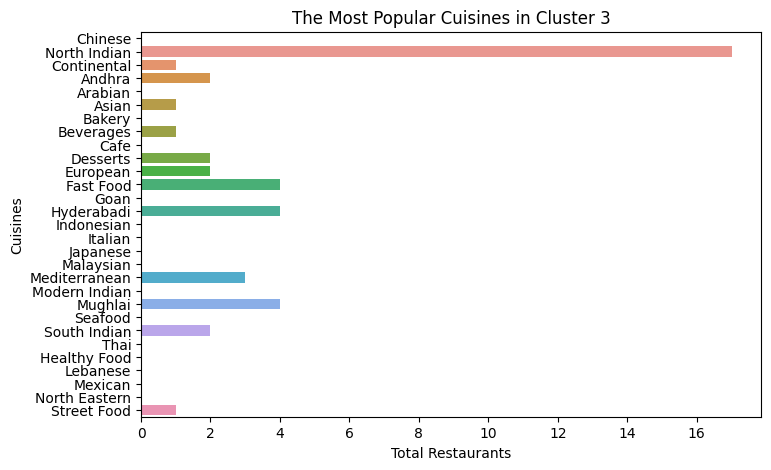

In [318]:
#visualizing cuisines in cluster 3
cluster_cuisines(crown_ds[crown_ds['label']==3],'Cluster 3')

* The restaurants in cluster 3 have mostly North Indian and other complementary foods available with them.
* The average rating is 3.65 and the average cost is 825 INR. These restaurants are also slightly higher in prices.

#### **Cluster 4**

In [319]:
#exploring cluster 3
crown_ds[crown_ds['label']==4].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
7,Shah Ghouse Spl Shawarma,300.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3.430000,4
9,Cream Stone,350.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.845000,4
23,Amul,150.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.929293,4


In [320]:
#describe
crown_ds[crown_ds['label']==4].describe()

,Cost,Total Cuisines,Avg Rating,label
count,16.000000,16.000000,16.000000,16.0
mean,406.250000,1.875000,3.146518,4.0
std,240.052078,0.806226,1.275203,0.0
min,150.000000,1.000000,0.000000,4.0
25%,200.000000,1.000000,3.087500,4.0
50%,350.000000,2.000000,3.667500,4.0
75%,600.000000,2.250000,3.846250,4.0
max,1000.000000,3.000000,3.965000,4.0


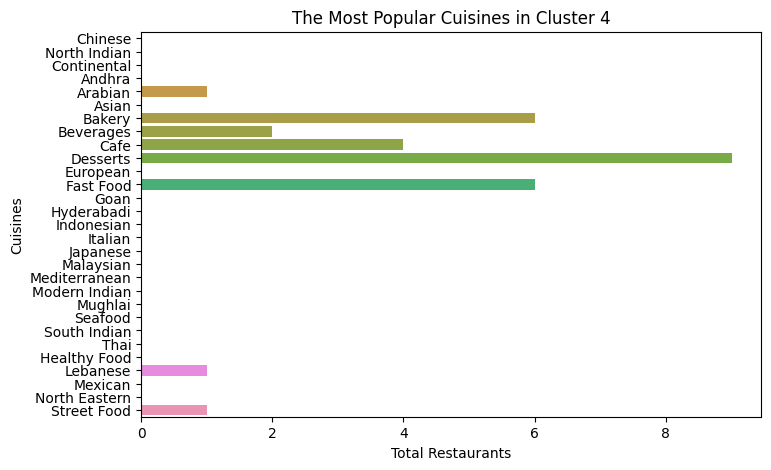

In [321]:
#visualizing cuisines in cluster 4
cluster_cuisines(crown_ds[crown_ds['label']==4],'Cluster 4')

#### **Observation on cluster 4**

* The restaurants in cluster 4 are basically small food joints,cafes and bakeries.
* The average rating is 3.15 and the average cost is 408 INR.

#### **Cluster 5**

In [322]:
#exploring cluster 5
crown_ds[crown_ds['label']==5].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
15,KFC,500.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.85,5
22,B-Dubs,1600.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.81,5
25,Tiki Shack,1000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.48,5


In [323]:
#describe
crown_ds[crown_ds['label']==5].describe()

,Cost,Total Cuisines,Avg Rating,label
count,13.000000,13.000000,13.000000,13.0
mean,942.307692,2.538462,3.429798,5.0
std,625.115374,1.198289,1.159394,0.0
min,400.000000,1.000000,0.000000,5.0
25%,500.000000,2.000000,3.095000,5.0
50%,600.000000,3.000000,3.610000,5.0
75%,1200.000000,3.000000,3.974026,5.0
max,2500.000000,5.000000,4.810000,5.0


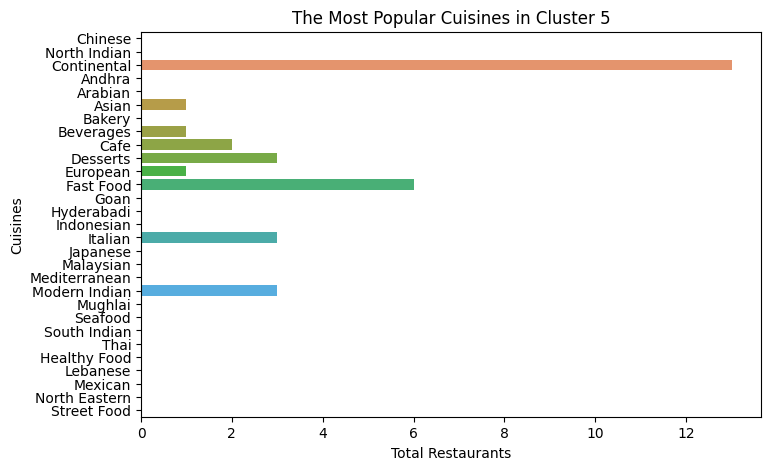

In [324]:
#visualizing cuisines in cluster 4
cluster_cuisines(crown_ds[crown_ds['label']==5],'Cluster 5')

#### **Observation of cluster 5**

* The restaurants in cluster 5 have mostly continental and fast foods available with them.

* The average cost is 942 INR, with an outlier cost of 2500 INR and a median cost of 600 INR. The average rating is 3.42. This indicates that the restaurant in this group next to one are often inexpensive.

## **Sentiment Analysis**

### **Exploratory Data Analysis**

In [342]:
#reviews data
sen_ds = review_ds.copy()
review_ds.head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0


Let's look at the variable "Rating" to see whether the majority of customer ratings are favorable or unfavorable.

Text(0.5, 1.0, 'Overall Ratings Count')

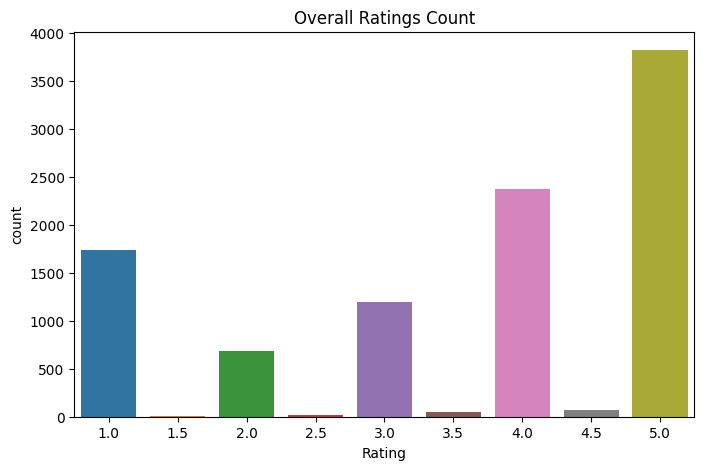

In [343]:
#visualizing different ratings count
sns.countplot(x=review_ds['Rating'])
plt.title('Overall Ratings Count')

Even if the majority of ratings are positive, there are still a considerable count of negative ratings.

### **Critics in the industry**

Customers have all the power they need to make or break a business in today's social media and Internet-driven world. When customers enjoy a service, they recommend it to their friends, family, and acquaintances, which leading to new business. All of this word-of-mouth advertising is free, and when an experience is shared on a platform that is open to the public, it is shared with everyone on that platform. Customers will complain if you are unable to provide a satisfying customer experience for any reason. In order to lessen the bad marketing impact, Zomato, like any other business, needs to address the issue, especially with those reviewers who have received greater attention. In order to increase the number of devoted customers it has, every industry must combat the complaints and critiques it faces.

In order to identify the areas that require improvement, an effort has been made to group the customers who have a good number of followers and who have consistently supplied more reviews with negative ratings.

In [345]:
#grouping reviewers with low rating and high reviews and followers
critics_ds = review_ds.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index().sort_values(by=['Rating','Reviews','Followers'],
            ascending=[True,False,False],ignore_index=True)
critics_ds = critics_ds[:30]
critics_ds.head()

,Reviewer,Reviews,Followers,Rating
0,Sumit,401,2736.0,1.0
1,D.S,195,2079.0,1.0
2,Ram Raju.,115,282.0,1.0
3,Farhaan Nasir (bankruptfoodie),107,503.0,1.0
4,Suyash Dhandhania,92,495.0,1.0


In [346]:
#all the top 30 critics have given avg rating as 1
critics_ds['Rating'].value_counts()

1.0    30
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Critics in the Industry')

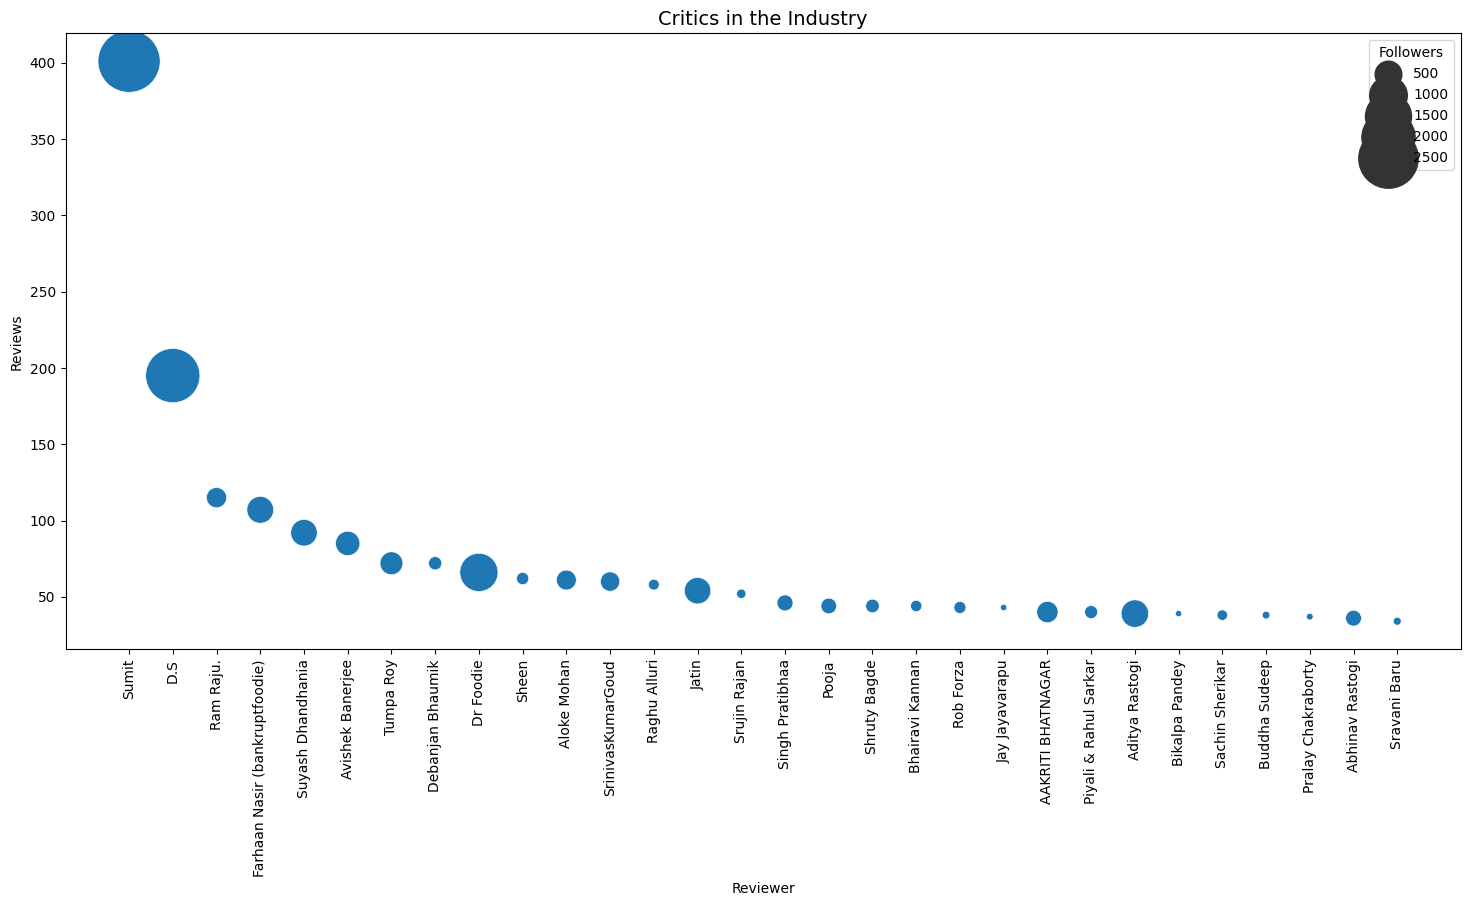

In [347]:
#visualizing critics through scatterplot
plt.figure(figsize=(18,8))
sns.scatterplot(data=critics_ds, x="Reviewer", y="Reviews", size="Followers",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
ax.axes.get_xaxis().set_visible(False)
plt.title('Critics in the Industry',size=14)

## **Preprocessing and visualization of Text**

In [348]:
#reviews dataset
sen_ds.head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0


In [349]:
#function to remove punctuation from the reviews
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with empty string,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [350]:
#applying remove punctuation to whole dataset
sen_ds['Review'] = sen_ds['Review'].apply(remove_punctuation)


In [351]:
#removing stopwords
#importing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [353]:
# extracting the stopwords from nltk library
stopword = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    # joining the list of words with space separator
    return " ".join(text)

sen_ds['Review'] = sen_ds['Review'].apply(remove_stopwords)

In [354]:
#assigning ratings into positive, neutral and negative sentiments for visualization
sen_ds['sentiment'] = sen_ds['Rating'].apply(lambda rating : 1 if rating > 3.5 else (0 if 3 <= rating <= 3.5 else -1))

Text(0.5, 1.0, 'Number of Positive, Neutral and Negative Sentiments')

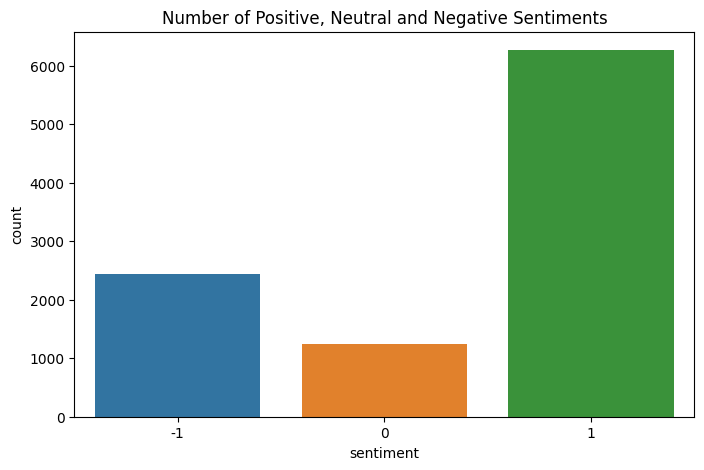

In [355]:
#visualizing number of sentiments
sns.countplot(x=sen_ds['sentiment'])
plt.title('Number of Positive, Neutral and Negative Sentiments',size=12)

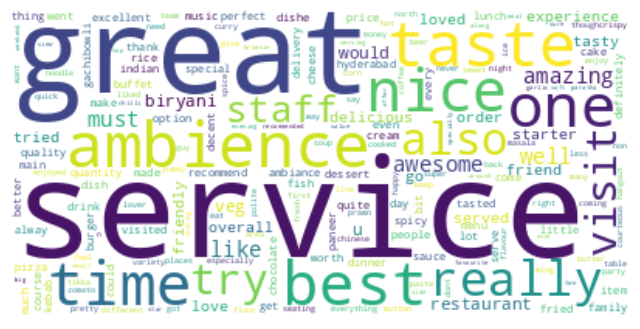

In [356]:
#visualizing review text
#importing wordcloud
from wordcloud import WordCloud

#visualizing negative and positive reviews seperately
positive_reviews = sen_ds[sen_ds['sentiment'] == 1]
negative_reviews = sen_ds[sen_ds['sentiment'] == -1]

#since these words were in the overall wordcloud and doesn't contribute in distinguishing between neg and positive sentiments
stopword.extend(["food","good",'place','chicken','ordered'])
#positive wordcloud
pos_text = " ".join(review for review in positive_reviews.Review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

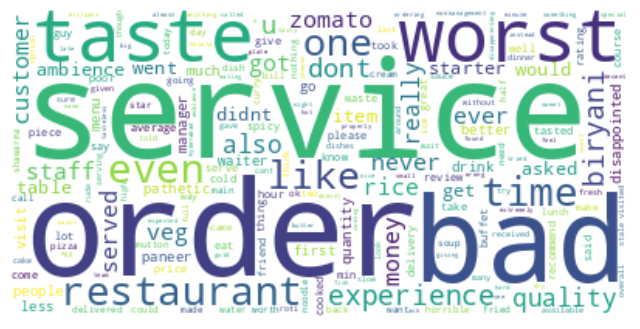

In [357]:
#negative wordcloud
neg_text = " ".join(review for review in negative_reviews.Review)
neg_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


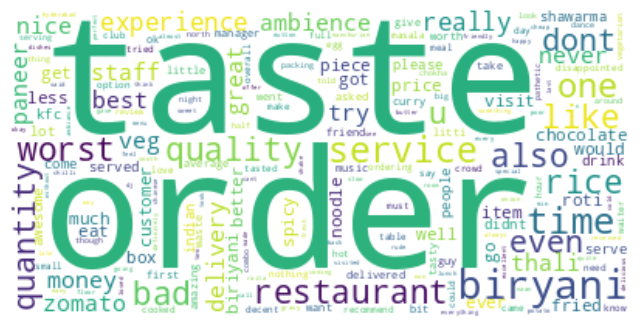

In [358]:
#word cloud for restaurants in low ratings ds
low_rating_reviews=sen_ds.loc[sen_ds['Restaurant'].isin(list(low_rating_ds['Name']))]
rev_text = " ".join(review for review in low_rating_reviews.Review)
rev_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(rev_text)
plt.imshow(rev_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

When reading the terms used in evaluations of restaurants with low ratings, it is clear that the consumers either didn't enjoy the taste, had a bad experience, or perhaps the order packaging wasn't up to par. Some of these restaurants had medium-range prices, as was previously mentioned.

In [359]:
#assigning ratings into positive and negative sentiments i.e. binary problem
sen_ds['sentiment'] = sen_ds['Rating'].apply(lambda rating : 1 if rating > 3 else 0)

In [360]:
#selecting features
sen_ds['Index'] = list(range(0,len(sen_ds)))
sen_ds.set_index(['Index','Restaurant','Reviewer'],inplace=True)
sen_ds = sen_ds[['Review','sentiment']]

In [361]:
#import stemmer
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

#applying stemmer
sen_ds['Review'] = sen_ds['Review'].apply(stemming)

### **Modelling**

In [362]:
#train test split
X = sen_ds['Review']
y = sen_ds['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2)

In [363]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


### **Logistic Regression**

In [364]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_lr))

Results for Logistic Regression
0.8518332496233049
[[ 616  112]
 [ 183 1080]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       728
           1       0.91      0.86      0.88      1263

    accuracy                           0.85      1991
   macro avg       0.84      0.85      0.84      1991
weighted avg       0.86      0.85      0.85      1991



### **Random Forest**

In [365]:
#import
from sklearn.ensemble import RandomForestClassifier
#fitting
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)
rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest")
print(rf_score)
y_pred_rf = rf.predict(X_test_vec)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
#report
print(classification_report(y_test,y_pred_rf))

Results for Random Forest
0.856353591160221
[[ 526  202]
 [  84 1179]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.79       728
           1       0.85      0.93      0.89      1263

    accuracy                           0.86      1991
   macro avg       0.86      0.83      0.84      1991
weighted avg       0.86      0.86      0.85      1991



Correctly anticipating negative feelings in the business problem is crucial, but it's more crucial for the models to reduce the number of false positives. False positives mean that reviews were mistakenly counted as positive when they were actually negative, which means that you won't have a problem to address.

Although Logistic Regression performs worse in terms of reducing False positives than Random Forest, the number of false negatives is higher. As a result, Logistic Regression appears to be penalizing False Positives more harshly as desired.

# **Conclusion**

The project comes to a close here,and some key conclusions that should be made are:

* The best restaurants in Hyderabad are Buddies, Bar & Barbecue, B-Dubs, and AB's - Absolute Barbecues.

* The cuisines that the majority of restaurants are ready to offer are the ones that are most in demand. North Indian, Chinese, Continental, and Hyderabadi food are the most well-liked cuisines in Hyderabad.

* The per person cost at restaurants in Hyderabad ranges from 140 to 2700 INR. Mohammedia Shawarma is the cheapest restaurant, and Collage - Hyatt Hyderabad Gachibowli is the priciest.

* It is crucial to separate out the restaurants with the lowest ratings in order to improve the overall customer experience, according to the results of a simple cost-benefit analysis on Zomato conducted with a few assumptions as the basis for the little business expertise that could be acquired. These establishments were little eateries or ones that charged a lot for the meals they served. More effort should be put into advertising, and reviews, particularly for these restaurant, should be examined and improved. It appears that Mohammedia Shawarma is profitable.

* Using two methods, restaurant clustering was carried out. With just two features at first, and then with all of them.Kmeans Clustering performed effectively in the initial method, but when the dimensions increased, it was unable to discern between the clusters; as a result, principal component analysis was performed, followed by clustering into 6 groups. The data points inside the clusters shared a lot of commonalities.

* Cluster 0: The restaurants in cluster 0 have popular cuisines available with them including North Indian, Chinese, and especially Hyderabadi. The average rating is 3.22 the average cost is 675 INR. These restaurants are casual dining restaurants with lower per-person costs and ratings than cluster 2

* Cluster 1: The restaurants in cluster 1 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others. The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR.

* Cluster 2: The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Complimentary.The average cost is 1429 INR, and the average rating is 3.88,which is better than the other 2 clusters.These restaurants are fine dinning restaurants.

* Cluster 3:The restaurants in cluster 3 have mostly North Indian and other complementary foods available with them.The average rating is 3.65 and the average cost is 825 INR. These restaurants are also slightly higher in prices than cluster 5.

* Cluster 4: The restaurants in cluster 4 are basically small food joints, bakeries and cafes.The average rating is 3.15 and the average cost is 408 INR.

* Cluster 5: The restaurants in cluster 5 have mostly continental and fast foods available with them.The average cost is 942 INR, with an outlier cost of 2500 INR and a median cost of 600 INR. The average rating is 3.42. This indicates that the restaurant in this group next to one are often inexpensive.

* Customers having good number of followers who have left more evaluations with consistently negative ratings were grouped together as industry critics. Ram Raju, Sumit, and D.S. are the top three critics.

* The reviews were subjected to sentiment analysis, and a model was developed to distinguish between good and negative attitudes. Even thought Logistic Regression performs worse in terms of lowering False positives than Random Forest, the number of false negatives is higher. As a result, Logistic Regression appears to be penalizing False Positives more harshly as desired.

#### **Recomendation**

* Work with restaurants that have received negative reviews to find a solution that benefits both parties.

* According to categories ratings would be there, such as packaging, delivery, flavor, excellence, amount, and service. This would aid in focusing on particular fields that are falling behind.